In [269]:
import pandas as pd
import numpy as np
import patsy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import svm

from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [14]:
df = pd.read_pickle('./data/mushrooms_alldummies.pkl')
df.head()

,poisonous,cap-shape_bell,cap-shape_conical,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-shape_convex,cap-surface_fibrous,cap-surface_grooves,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_woods,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df.corr().applymap(abs)['poisonous'].sort_values(ascending=False).head(20)

poisonous                          1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
ring-type_pendant                  0.540469
gill-size_broad                    0.540024
gill-color_buff                    0.538808
bruises_yes                        0.501530
stalk-surface-above-ring_smooth    0.491314
spore-print-color_chocolate        0.490229
ring-type_large                    0.451619
population_several                 0.443722
stalk-surface-below-ring_smooth    0.425444
spore-print-color_brown            0.416645
spore-print-color_black            0.396832
spore-print-color_white            0.357384
gill-spacing_crowded               0.348387
habitat_paths                      0.323346
gill-color_brown                   0.288943
odor_fishy                         0.286360
Name: poisonous, dtype: float64

In [15]:
for col in df.columns:
    print(col)

poisonous
cap-shape_bell
cap-shape_conical
cap-shape_flat
cap-shape_knobbed
cap-shape_sunken
cap-shape_convex
cap-surface_fibrous
cap-surface_grooves
cap-surface_smooth
cap-surface_scaly
cap-color_buff
cap-color_cinnamon
cap-color_red
cap-color_gray
cap-color_brown
cap-color_pink
cap-color_green
cap-color_purple
cap-color_white
cap-color_yellow
bruises_no
bruises_yes
odor_almond
odor_creosote
odor_foul
odor_anise
odor_musty
odor_none
odor_pungent
odor_spicy
odor_fishy
gill-attachment_attached
gill-attachment_free
gill-spacing_close
gill-spacing_crowded
gill-size_broad
gill-size_narrow
gill-color_buff
gill-color_red
gill-color_gray
gill-color_chocolate
gill-color_black
gill-color_brown
gill-color_orange
gill-color_pink
gill-color_green
gill-color_purple
gill-color_white
gill-color_yellow
stalk-shape_enlarging
stalk-shape_tapering
stalk-root_missing
stalk-root_bulbous
stalk-root_club
stalk-root_equal
stalk-root_rooted
stalk-surface-above-ring_fibrous
stalk-surface-above-ring_silky
stalk-

In [237]:
# cols_to_select = ['poisonous',
#                   'cap-shape_bell','cap-shape_knobbed','cap-shape_convex',
#                   'cap-surface_grooves','cap-surface_scaly',
#                   'cap-color_red','cap-color_pink','cap-color_green','cap-color_purple','cap-color_white','cap-color_yellow',
#                   'bruises_yes',
# #                   'odor_almond',#'odor_none','odor_anise',
#                   'gill-attachment_attached',
#                   'gill-size_broad',
#                   'gill-color_red','gill-color_black','gill-color_orange','gill-color_pink','gill-color_green','gill-color_purple','gill-color_white','gill-color_yellow',
#                   'stalk-surface-above-ring_scaly',
#                   'stalk-surface-below-ring_scaly',
#                   'stalk-color-above-ring_red','stalk-color-above-ring_orange','stalk-color-above-ring_pink','stalk-color-above-ring_white','stalk-color-above-ring_yellow',
#                   'stalk-color-below-ring_red','stalk-color-below-ring_orange','stalk-color-below-ring_pink','stalk-color-below-ring_white','stalk-color-below-ring_yellow',
#                   'veil-color_white','veil-color_orange',
#                   'ring-number_one','ring-number_two',
#                   'habitat_woods']

cols_to_select = ['poisonous',
                  'cap-shape_bell','cap-shape_knobbed','cap-shape_convex',
                  'cap-surface_grooves','cap-surface_scaly',
                  'cap-color_red','cap-color_green','cap-color_purple','cap-color_white',
                  'bruises_yes',
                  'odor_almond',
                  'gill-attachment_attached',
                  #'gill-size_broad',
                  'gill-color_red','gill-color_black','gill-color_orange','gill-color_green','gill-color_purple',
#                   'stalk-surface-above-ring_scaly',
#                   'stalk-surface-below-ring_scaly',
#                   'stalk-color-above-ring_red', 'stalk-color-above-ring_white',
#                   'stalk-color-above-ring_red','stalk-color-above-ring_orange','stalk-color-above-ring_pink','stalk-color-above-ring_white','stalk-color-above-ring_yellow',
#                   'stalk-color-below-ring_red', 'stalk-color-below-ring_white',
                  'ring-number_none']


In [267]:
def model_scores(clf, xtrain, ytrain, xtest, ytest):
    clf.fit(xtrain,ytrain)
    # calculate and print scores for train
    train_acc=clf.score(xtrain, ytrain)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print(classification_report(ytrain, clf.predict(xtrain)))
    y_true = ytrain
    y_pred = clf.predict(xtrain)
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    # calculate and print scores for test
    test_acc=clf.score(xtest,ytest)
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    print(classification_report(ytest, clf.predict(xtest)))
    y_true = ytest
    y_pred = clf.predict(xtest)
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
def make_plots(clf,xtest,ytest):
    # make plots
    fig,ax = plt.subplots(1,2,figsize=(10,4))
    # plot ROC
    ax = plt.subplot(1,2,1)
    plot_roc(clf,xtest,ytest)
    # plot confusion matrix
    ax = plt.subplot(1,2,2)
    plot_conf(clf,xtest,ytest)

def plot_roc(clf,x,y):
    
    # calculate ROC
    y_score=clf.predict_proba(x)[:,1]
    fpr, tpr,_ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot([0,1],[0,1],'k:')
    plt.plot(fpr,tpr,'g')
    plt.xlabel('FPR',fontsize=12)
    plt.ylabel('TPR',fontsize=12)
    plt.axis('scaled')
    plt.tight_layout()

    
def plot_conf(clf,x,y):
    
    y_true = y
    y_pred = clf.predict(x)
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
#     print(conf)
    
    # plot confusion matrix
    plt.imshow(conf, interpolation='nearest',cmap=plt.cm.bone_r)
    plt.text(0,0,conf[0][0],fontsize=15,fontweight='bold',color='w',ha='center')
    plt.text(1,0,conf[0][1],fontsize=15,fontweight='bold',color='#CC0000',ha='center')
    plt.text(0,1,conf[1][0],fontsize=15,fontweight='bold',color='c',ha='center')
    plt.text(1,1,conf[1][1],fontsize=15,fontweight='bold',color='w',ha='center')
    ax = plt.gca()
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Poisonous\n(Predicted)','Edible\n(Predicted)'],fontsize=12)
    ax.set_yticks([0,1])
    ax.set_yticklabels(['Poisonous\n(True)','Edible\n(True)'],fontsize=12)
    plt.tight_layout()

In [280]:
data = df[cols_to_select]
X = data.iloc[:,1:]
y = data.iloc[:,0]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.3, random_state=432)


### Logistic Regression

Training Data Accuracy: 0.81
             precision    recall  f1-score   support

          0       0.83      0.78      0.81      2945
          1       0.78      0.83      0.80      2741

avg / total       0.81      0.81      0.81      5686

[[2281  460]
 [ 647 2298]]
Test Data Accuracy:     0.81
             precision    recall  f1-score   support

          0       0.84      0.79      0.81      1263
          1       0.79      0.83      0.81      1175

avg / total       0.81      0.81      0.81      2438

[[980 195]
 [265 998]]


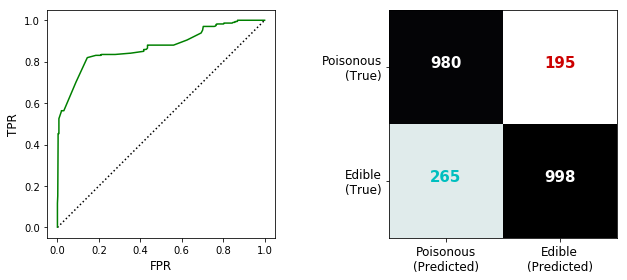

In [281]:
clf = LogisticRegression()
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

{'C': 77.426368268112782}
Training Data Accuracy: 0.81
             precision    recall  f1-score   support

          0       0.83      0.78      0.81      2945
          1       0.78      0.83      0.80      2741

avg / total       0.81      0.81      0.81      5686

[[2282  459]
 [ 647 2298]]
Test Data Accuracy:     0.81
             precision    recall  f1-score   support

          0       0.84      0.79      0.81      1263
          1       0.79      0.83      0.81      1175

avg / total       0.81      0.81      0.81      2438

[[980 195]
 [265 998]]


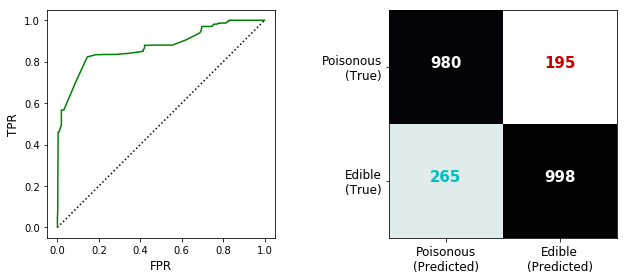

In [282]:
gs = GridSearchCV(estimator=LogisticRegression(), 
                   param_grid={'C': np.logspace(-2,3,num=10)}, 
                   n_jobs=-1)
gs.fit(xtrain,ytrain)
print(gs.best_params_)
clf = gs.best_estimator_
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

### Decision Tree

Training Data Accuracy: 0.86
             precision    recall  f1-score   support

          0       0.89      0.83      0.86      2945
          1       0.83      0.89      0.86      2741

avg / total       0.86      0.86      0.86      5686

[[2430  311]
 [ 491 2454]]
Test Data Accuracy:     0.87
             precision    recall  f1-score   support

          0       0.89      0.86      0.87      1263
          1       0.85      0.89      0.87      1175

avg / total       0.87      0.87      0.87      2438

[[1041  134]
 [ 179 1084]]


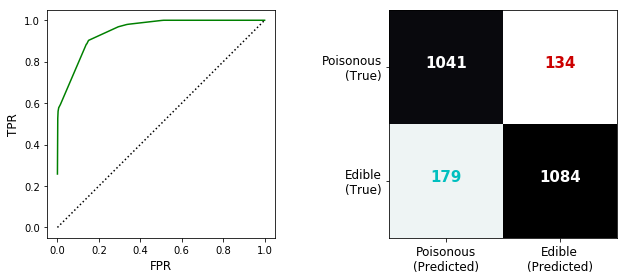

In [283]:
clf = DecisionTreeClassifier(max_depth=8)
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

{'max_depth': 9}
Training Data Accuracy: 0.86
             precision    recall  f1-score   support

          0       0.89      0.83      0.86      2945
          1       0.83      0.89      0.86      2741

avg / total       0.86      0.86      0.86      5686

[[2434  307]
 [ 491 2454]]
Test Data Accuracy:     0.87
             precision    recall  f1-score   support

          0       0.89      0.86      0.88      1263
          1       0.85      0.89      0.87      1175

avg / total       0.87      0.87      0.87      2438

[[1045  130]
 [ 179 1084]]


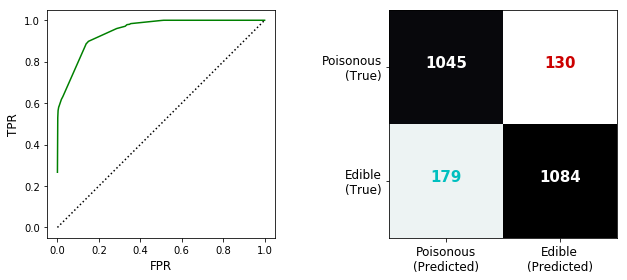

In [284]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(), 
                   param_grid={'max_depth': range(1,10)}, 
                   n_jobs=-1)
gs.fit(xtrain,ytrain)
print(gs.best_params_)
clf = gs.best_estimator_
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

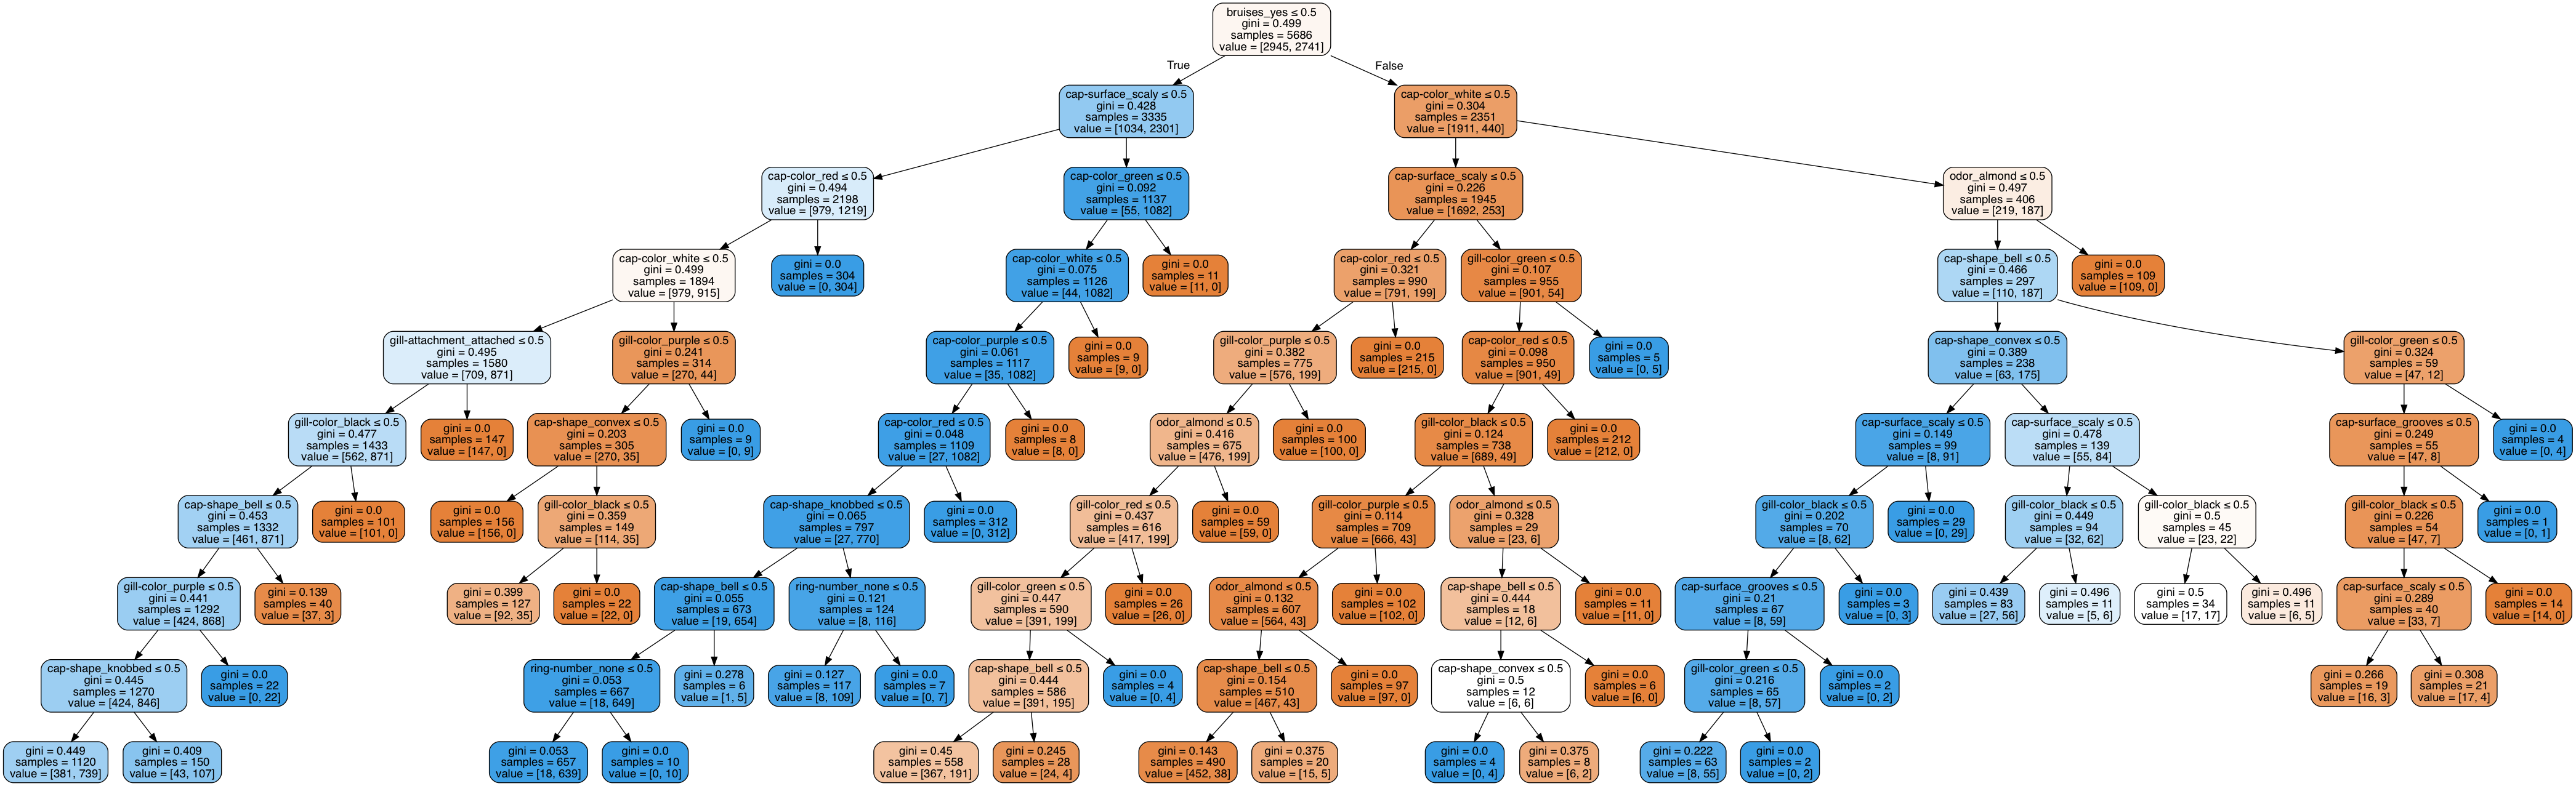

In [285]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Random Forest

Training Data Accuracy: 0.86
             precision    recall  f1-score   support

          0       0.89      0.83      0.86      2945
          1       0.83      0.89      0.86      2741

avg / total       0.86      0.86      0.86      5686

[[2434  307]
 [ 491 2454]]
Test Data Accuracy:     0.87
             precision    recall  f1-score   support

          0       0.89      0.86      0.88      1263
          1       0.85      0.89      0.87      1175

avg / total       0.87      0.87      0.87      2438

[[1045  130]
 [ 179 1084]]


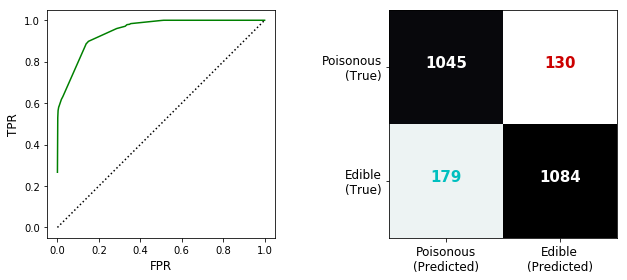

In [286]:
rf = RandomForestClassifier(n_estimators=100)
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

{'n_estimators': 1000}
Training Data Accuracy: 0.86
             precision    recall  f1-score   support

          0       0.89      0.83      0.86      2945
          1       0.83      0.89      0.86      2741

avg / total       0.86      0.86      0.86      5686

[[2446  295]
 [ 497 2448]]
Test Data Accuracy:     0.87
             precision    recall  f1-score   support

          0       0.90      0.86      0.88      1263
          1       0.85      0.89      0.87      1175

avg / total       0.88      0.87      0.87      2438

[[1049  126]
 [ 181 1082]]


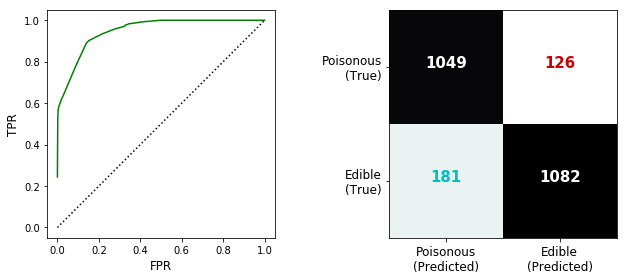

In [287]:
gs = GridSearchCV(estimator=RandomForestClassifier(),
                   scoring='roc_auc',
                   param_grid={'n_estimators': [10,20,50,100,250,500,1000]}, 
                   n_jobs=-1)
gs.fit(X,y)
print(gs.best_params_)
clf = gs.best_estimator_
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

### Naive Bayes

Training Data Accuracy: 0.86
             precision    recall  f1-score   support

          0       0.89      0.83      0.86      2945
          1       0.83      0.89      0.86      2741

avg / total       0.86      0.86      0.86      5686

[[2446  295]
 [ 497 2448]]
Test Data Accuracy:     0.87
             precision    recall  f1-score   support

          0       0.90      0.86      0.88      1263
          1       0.85      0.89      0.87      1175

avg / total       0.88      0.87      0.87      2438

[[1049  126]
 [ 181 1082]]


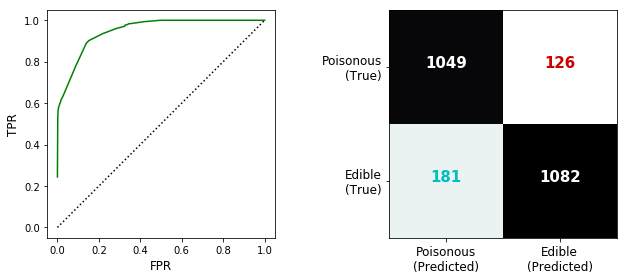

In [288]:
model = naive_bayes.BernoulliNB()
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

### SVM

Training Data Accuracy: 0.86
             precision    recall  f1-score   support

          0       0.88      0.83      0.86      2945
          1       0.83      0.88      0.85      2741

avg / total       0.86      0.86      0.86      5686

[[2420  321]
 [ 502 2443]]
Test Data Accuracy:     0.87
             precision    recall  f1-score   support

          0       0.88      0.86      0.87      1263
          1       0.85      0.87      0.86      1175

avg / total       0.87      0.87      0.87      2438

[[1028  147]
 [ 182 1081]]


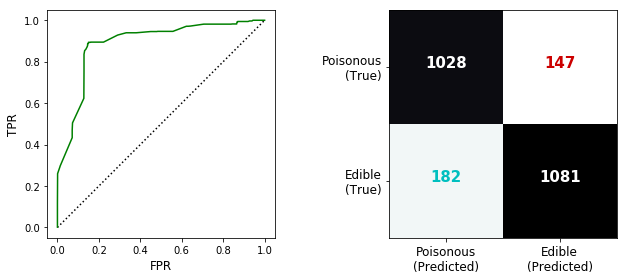

In [289]:
clf = svm.SVC(kernel='rbf', gamma = 0.1, probability=True)
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)

In [ ]:
gs = GridSearchCV(estimator=svm.SVC(kernel='rbf', probability=True),
                   scoring='roc_auc',
                   param_grid={'gamma': np.logspace(-3,3,num=10)}, 
                   n_jobs=-1)
gs.fit(X,y)
print(gs.best_params_)
clf = gs.best_estimator_
model_scores(clf, xtrain, ytrain, xtest, ytest)
make_plots(clf,xtest,ytest)